<a href="https://colab.research.google.com/github/ChovenDV/Clusterization-OATD4/blob/main/%D0%9E%D0%90%D0%A2%D0%94_%D0%BB%D0%B0%D0%B1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plot


In [ ]:
# 1
X, y = make_blobs(n_samples = 100, centers = 7, random_state = 41, cluster_std  = 2, shuffle = 1)

<function matplotlib.pyplot.show>

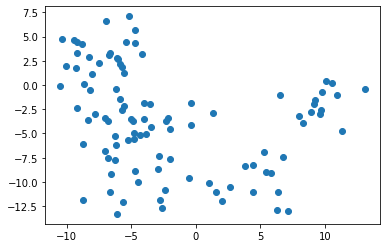

In [ ]:
# 2
plot.scatter(X[:,0], X[:,1])
plot.show

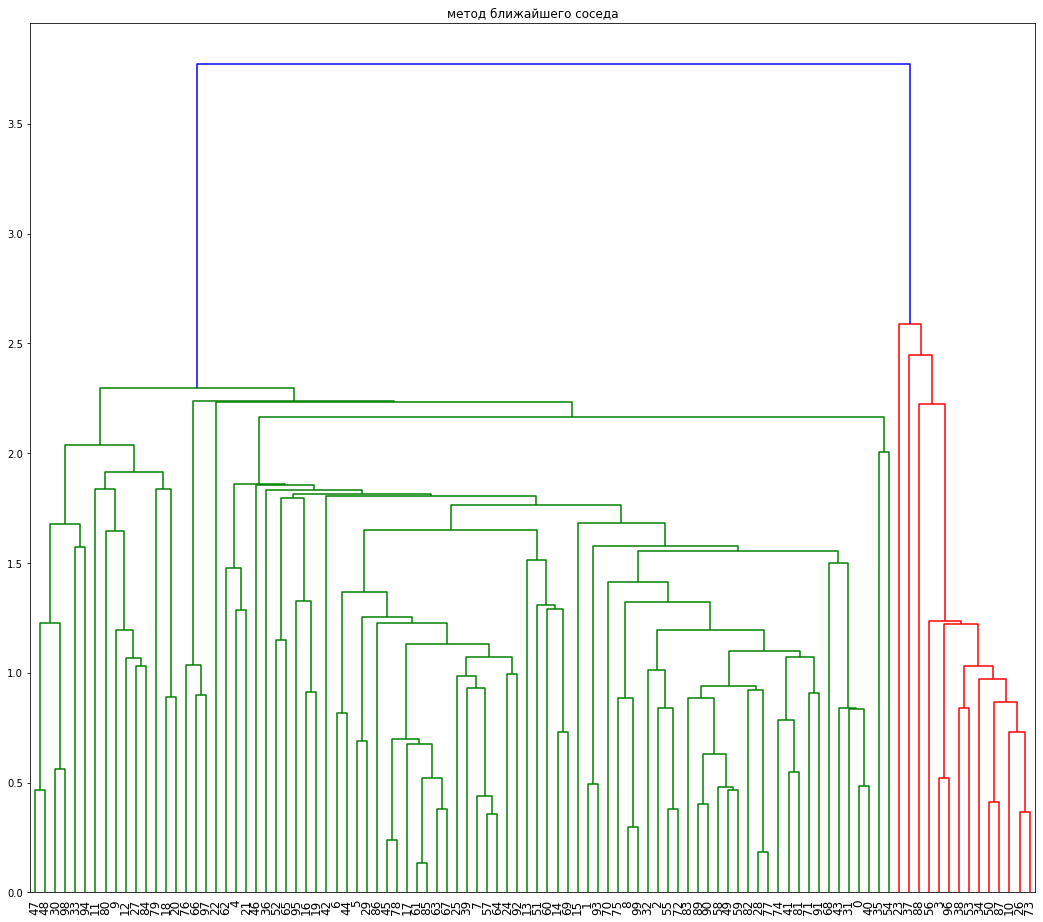

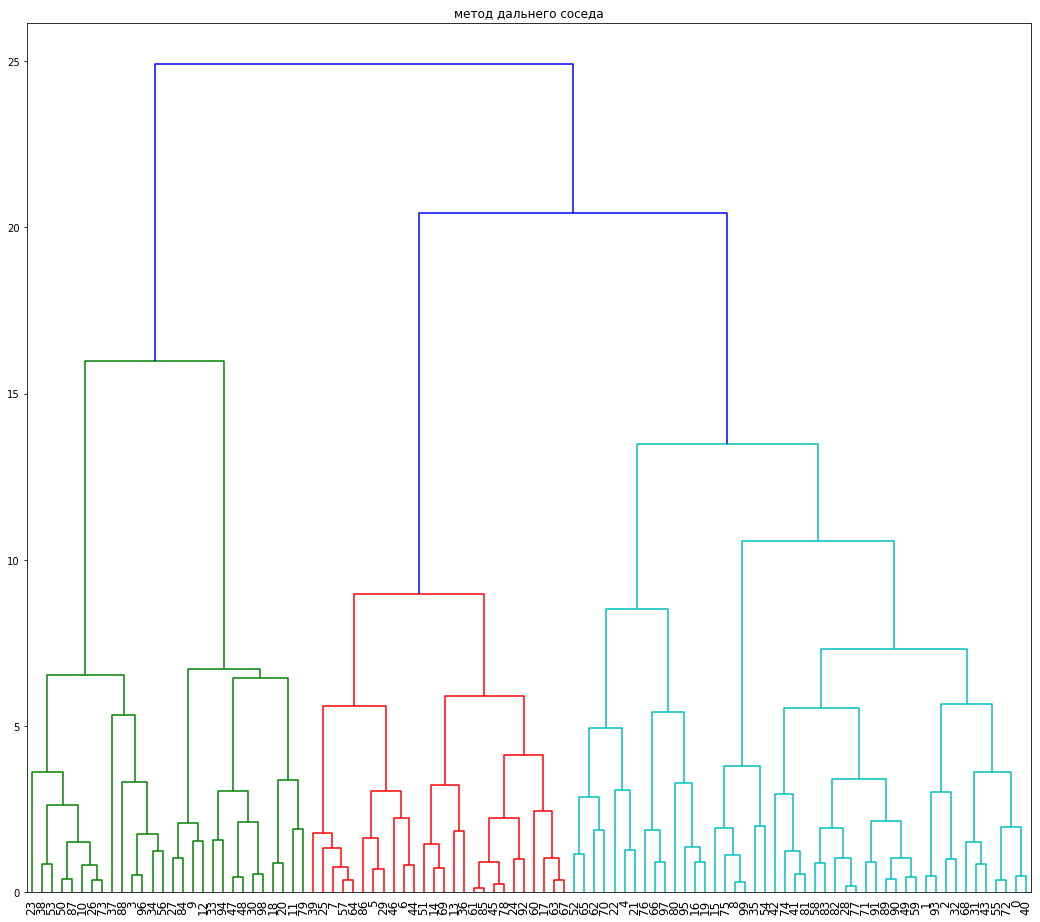

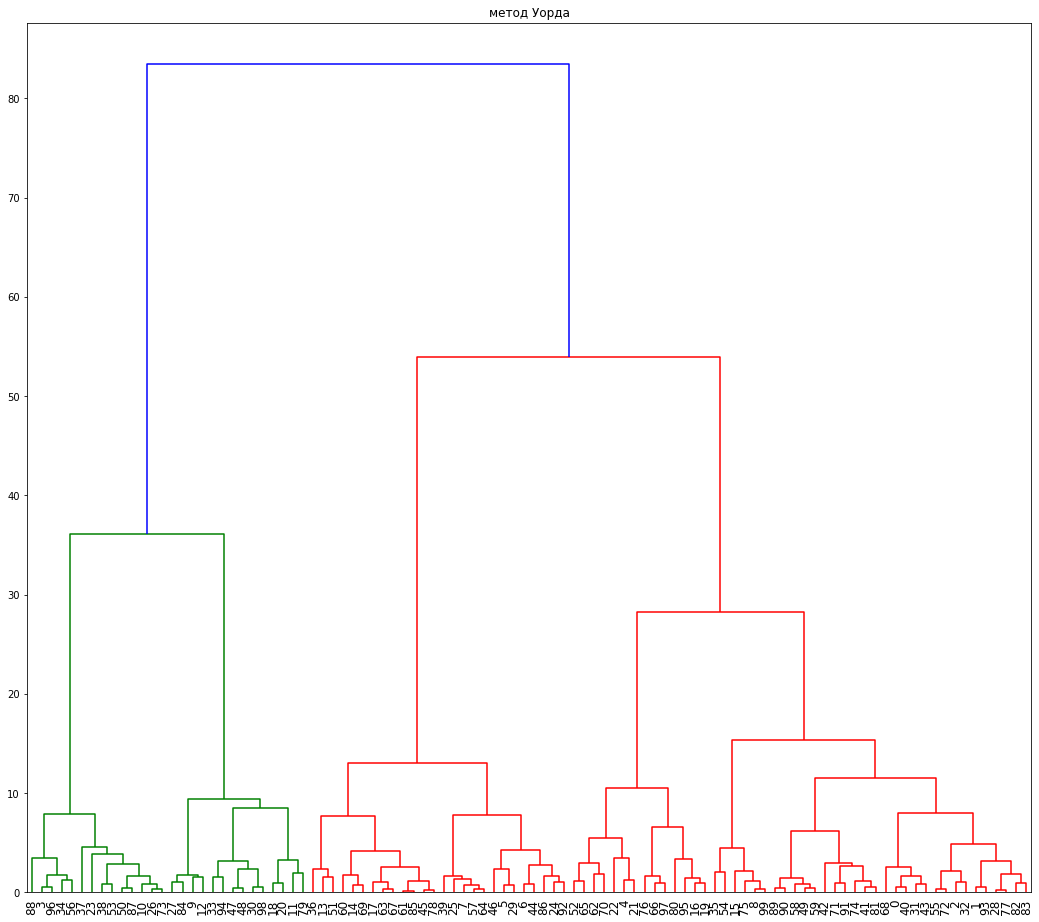

In [ ]:
# 3
# метод ближайшего соседа
mergings_single = linkage(X, method='single')
plot.figure(figsize=(18,16))
plot.title("метод ближайшего соседа")
dendrogram(mergings_single, leaf_font_size=12)
plot.show()

# метод дальнего соседа
mergings_complete = linkage(X, method='complete')
plot.figure(figsize=(18,16))
plot.title("метод дальнего соседа")
dendrogram(mergings_complete, leaf_font_size=12)
plot.show()

# метод Уорда
mergings_ward = linkage(X, method='ward')
plot.figure(figsize=(18,16))
plot.title("метод Уорда")
dendrogram(mergings_ward, leaf_font_size=12)
plot.show()

In [ ]:
# 4
clusters = 3

Принадлежность к кластеру каждого элемента выборки:
 [3 3 3 1 3 2 2 2 3 1 1 1 1 2 2 3 3 2 1 3 1 3 3 1 2 2 1 1 3 2 1 3 3 1 1 3 2
 1 1 2 3 3 3 3 2 2 2 1 1 3 1 2 3 1 3 3 1 2 3 3 2 2 3 2 2 3 3 2 3 2 3 3 3 1
 3 3 3 3 2 1 3 3 3 3 1 2 2 1 1 3 3 3 2 3 1 3 1 3 1 3]

Координаты центроидов кластеров:
 [[ 7.08044793 -5.95608183]
 [-7.3407709   3.05313727]
 [-4.69383856 -5.92577929]] 



<function matplotlib.pyplot.show>

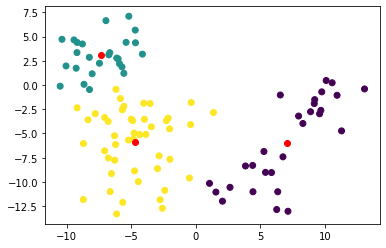

In [ ]:
# 5
def update_cluster_centers(X, c):
  for clust in range(1, clusters+1):
    ix = np.where(c==clust)
    mu[clust-1,:] = np.mean(X[ix,:], axis=1)
  return mu

T = fcluster(mergings_complete, 3, 'maxclust')
print("Принадлежность к кластеру каждого элемента выборки:\n", T)

mu = np.array([[0.0,0], [0,0], [0,0]])
mu = update_cluster_centers(X, T)
print("\nКоординаты центроидов кластеров:\n", mu, "\n")

plot.scatter(X[:,0], X[:,1], c=T)
plot.scatter(mu[:,0], mu[:,1], c=['red'])
plot.show

In [ ]:
# 6
from math import sqrt
from itertools import combinations

def find_clusters_and_centers(X, T, centers=True):
  ret = []
  for clust in range(1, clusters+1):
    ix = np.where(T==clust)
    cluster = X[ix,:][0]
    if centers == True:
      mean = [0, 0]
      for [x, y] in cluster:
        mean[0] += x
        mean[1] += y
      mean[0] /= len(cluster)
      mean[1] /= len(cluster)
      ret.append([cluster, mean])
    else:
      ret.append(cluster)
  return ret

def rho(p1, p2):
  x1 = p1[0]
  x2 = p2[0]
  y1 = p1[1]
  y2 = p2[1]
  return sqrt((x2-x1)**2 + (y2-y1)**2)

def inertia(Xs, mus):
  inertia = 0
  for clust in range(clusters):
    for xy in Xs[clust]:
      mu = mus[clust]
      inertia += rho(xy, mu)**2
  return inertia/clusters

def within_cluster(Xs, mus):
  within_cluster = 0
  for clust in range(clusters):
    for xy in Xs[clust]:
      mu = mus[clust]
      within_cluster += rho(xy, mu)
  return within_cluster/clusters

def between_clusters(mus):
  between_clusters = 0
  for [mu1, mu2] in combinations(mus, 2):
    between_clusters += rho(mu1, mu2)
  return between_clusters/clusters

[[X_1, mu1], [X_2, mu2], [X_3, mu3]] = find_clusters_and_centers(X, T)

Xs = [X_1, X_2, X_3]
mus = [mu1, mu2, mu3]

print("Среднее суммы квадратов расстояний до центроида: ", inertia(Xs, mus))
print("Среднее суммы средних внутрикластерных расстояний: ", within_cluster(Xs, mus))
print("Среднее суммы межкластерных расстояний: ", between_clusters(mus))

Среднее суммы квадратов расстояний до центроида:  600.6323971242913
Среднее суммы средних внутрикластерных расстояний:  125.84924260070936
Среднее суммы межкластерных расстояний:  12.713103761108728


K-means, количество кластеров -  1
Принадлежность к кластеру каждого элемента выборки:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Среднее суммы квадратов расстояний до центроида:  2246.818491975602
Среднее суммы средних внутрикластерных расстояний:  0.0
Среднее суммы межкластерных расстояний:  0.0 

K-means, количество кластеров -  2
Принадлежность к кластеру каждого элемента выборки:
 [0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0]
Среднее суммы квадратов расстояний до центроида:  1079.1990567829687
Среднее суммы средних внутрикластерных расстояний:  46.05888756838721
Среднее суммы межкластерных расстояний:  4.305071640339391 

K-means, количество кластеров -  3
Принадлежн

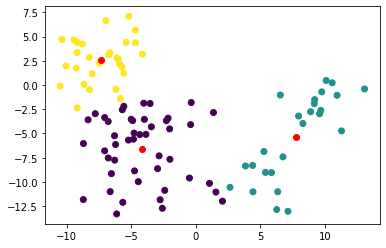

In [ ]:
# 7
n = range(1, 11)
inertia = []
within = []
between = []
for i in n:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  all_predictions = kmeans.predict(X)

  kmeans_Xs = find_clusters_and_centers(X, all_predictions, False)
  kmeans_mus = kmeans.cluster_centers_

  inertia.append(kmeans.inertia_/clusters)
  within.append(within_cluster(kmeans_Xs, kmeans_mus))
  between.append(between_clusters(kmeans_mus))

  print("K-means, количество кластеров - ", i)
  print("Принадлежность к кластеру каждого элемента выборки:\n", all_predictions)
  print("Среднее суммы квадратов расстояний до центроида: ", inertia[i-1])
  print("Среднее суммы средних внутрикластерных расстояний: ", within[i-1])
  print("Среднее суммы межкластерных расстояний: ", between[i-1], "\n")

  if i == 3:
    plot.scatter(X[:,0], X[:,1], c=all_predictions)
    plot.scatter(kmeans_mus[:,0], kmeans_mus[:,1], c=['red'])
    plot.show

Text(0.5, 1.0, 'Средняя сумма межкластерных расстояний')

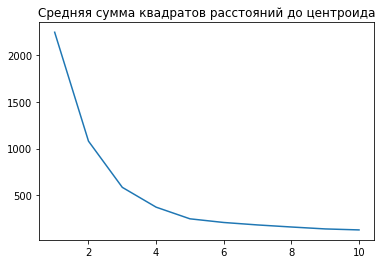

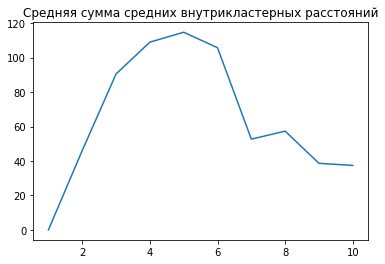

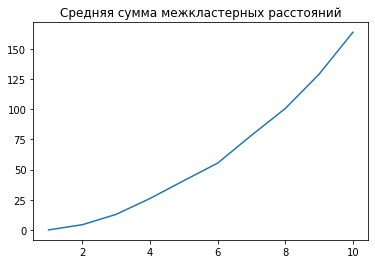

In [ ]:
# 8
plot.figure()
plot.plot(n, inertia)
plot.title("Средняя сумма квадратов расстояний до центроида")

plot.figure()
plot.plot(n, within)
plot.title("Средняя сумма средних внутрикластерных расстояний")

plot.figure()
plot.plot(n, between)
plot.title("Средняя сумма межкластерных расстояний")